In [1]:
import numpy 
from sklearn.neural_network import MLPRegressor 
from glob import glob
import pickle
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import pandas as pd

In [5]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = "C:/Users/ly264/Desktop/CSE151b_final_project/"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):

    
    outputs = None
    
    if split=="train":
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)[:int(n)]
        
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)[:int(n)]      
    
    else:
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

In [105]:
output = [d[1].flatten() for d in train_dataset]
in_put = [d[0].flatten() for d in train_dataset]
in_put[0]


array([-1303.7625276 ,  1138.31246403, -1303.51742401,  1138.71707532,
       -1303.21204952,  1139.21904709, -1302.84823902,  1139.8161695 ,
       -1302.42992386,  1140.50078551, -1301.96188374,  1141.26262409,
       -1301.4558762 ,  1142.08314552, -1300.92593051,  1142.94096098,
       -1300.38289221,  1143.81733833, -1299.83693982,  1144.69344162,
       -1299.30307674,  1145.54357628, -1298.78314062,  1146.36695077,
       -1298.26319828,  1147.18870759, -1297.74300535,  1148.00623848,
       -1297.22360328,  1148.81431759, -1296.70573541,  1149.61491347,
       -1296.18825919,  1150.41213503, -1295.67093647,  1151.20469326,
       -1295.15287446,  1151.99354667, -1294.63506871,  1152.7780662 ,
       -1294.11991324,  1153.5568605 , -1293.60805538,  1154.33176132,
       -1293.09994617,  1155.10151568, -1292.59382454,  1155.86684617,
       -1292.09151143,  1156.62596014, -1291.5911971 ,  1157.3821201 ,
       -1291.08718506,  1158.14207537, -1290.57690412,  1158.90776374,
      

In [106]:
a = in_put[0]

In [108]:
x = [ a[i] for i in range(len(a)) if i %2 == 0 ]
y =  [ a[i] for i in range(len(a)) if i %1 == 0 ]

In [111]:
xv = np.array(x[1:])-np.array(x[0:-1])
xv

array([0.24510359, 0.3053745 , 0.3638105 , 0.41831515, 0.46804012,
       0.50600754, 0.52994569, 0.5430383 , 0.5459524 , 0.53386308,
       0.51993611, 0.51994234, 0.52019294, 0.51940206, 0.51786787,
       0.51747623, 0.51732272, 0.51806201, 0.51780575, 0.51515547,
       0.51185786, 0.50810921, 0.50612163, 0.50231311, 0.50031433,
       0.50401204, 0.51028094, 0.5137649 , 0.51149676, 0.51057825,
       0.51005417, 0.50803358, 0.50451549, 0.50315388, 0.50250839,
       0.50132283, 0.500174  , 0.49550925, 0.49129274, 0.49029141,
       0.49810186, 0.50490375, 0.50256517, 0.50192865, 0.49799231,
       0.50158258, 0.5077064 , 0.50788241, 0.50858251])

In [164]:
def velocity(l):
    x = [ l[i] for i in range(len(l)) if i %2 == 0 ]
    y = [ l[i] for i in range(len(l)) if i %2 == 1 ]
    xv = np.array(x[1:])-np.array(x[0:-1])
    yv = np.array(y[1:])-np.array(y[0:-1])
    l = list(l) + list(xv)
    l = l + list(yv)
    return l



In [189]:
def get_csv(city):
    
    #get data ready for this city
    train_dataset = ArgoverseDataset(city, split = "train")
    output = [d[1].flatten() for d in train_dataset]
    in_put = [d[0].flatten() for d in train_dataset]
    in_put_new = [velocity(l) for l in in_put]
 
    # standardize the train data 
    #x_scaler = preprocessing.StandardScaler().fit(in_put)
   # y_scaler = preprocessing.StandardScaler().fit(output)
   # X_scaled = x_scaler.transform(in_put)
    #y_scaled = y_scaler.transform(output)
    
    
    #train the model for this city
    model = MLPRegressor(activation="relu", solver="adam", early_stopping=True,validation_fraction = 0.3,
    learning_rate="adaptive", max_iter=500,alpha=0.0005,hidden_layer_sizes = (32,64,64,128))
    model.fit(in_put_new,output)
    print(model.loss_)
    #get the predictoin 
    test_input,y =get_city_trajectories(city, "test", normalized=False)
    x_test = [ d.flatten() for d in test_input]
    in_put_newtest = [ velocity(l) for l in x_test]
    # xtest_scaler = preprocessing.StandardScaler().fit(x_test)
    # xtest_scaled = xtest_scaler.transform(x_test)
    
    y= model.predict(in_put_newtest)
    #real_y =y_scaler.inverse_transform(y)
    return y

In [190]:
get_csv("austin")

108.77791993429065


array([[-3.52381896e+01, -5.75268119e+02, -4.26030973e+01, ...,
        -5.55514246e+02, -4.67866048e+01, -5.63220722e+02],
       [-3.56181585e+02,  9.15252203e-01, -3.44201417e+02, ...,
        -1.03967234e+01, -3.46344033e+02, -1.26004593e+01],
       [ 5.16975898e+01, -2.51409329e+02,  5.13018645e+01, ...,
        -2.48004254e+02,  4.90955470e+01, -2.47728311e+02],
       ...,
       [-6.80420765e+02,  4.93905790e+02, -6.81288586e+02, ...,
         4.90690264e+02, -6.82826622e+02,  4.83817166e+02],
       [-1.14988038e+02,  1.59074404e+03, -1.13182784e+02, ...,
         1.56499341e+03, -1.20604712e+02,  1.57055134e+03],
       [ 3.73309021e+02, -1.49858190e+03,  3.71734311e+02, ...,
        -1.49678569e+03,  3.72925495e+02, -1.50350144e+03]])

In [191]:
# get all the prediction 
final =[]
for city in cities:
    x = get_csv(city)
    for ele in x:
        final.append(ele)


97.868811579875
157.80708751499174
95.72639854338782
792.0624724539435
163.63807359223014
249.7933487569418


In [192]:
len(final)

29843

In [194]:
np.savetxt("prediction.csv", 
           final,
           delimiter =", ",
           fmt ='% s')

In [234]:
df = pd.read_csv('C:/Users/ly264/Desktop/CSE151b_final_project/sample_submission.csv')

In [244]:
final

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

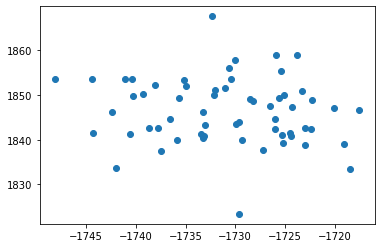

In [176]:
import matplotlib.pyplot as plt
y_show = y[677]
x_res = []
y_res = []
for i in range(0,120,2):
    x_res.append(y_show[i])
    y_res.append(y_show[i+1])
plt.scatter(x_res, y_res)
plt.show


In [249]:
    #get data ready for this city
    train_dataset = ArgoverseDataset("austin", split = "train")
    output = [d[1].flatten() for d in train_dataset]
    in_put = [d[0].flatten() for d in train_dataset]
    
    #train the model for this city
    model = MLPRegressor(activation="relu", solver="adam", early_stopping=False,
    learning_rate="adaptive", max_iter=400,alpha=0.001,hidden_layer_sizes = (32,64,64,128))
    
    model.fit(in_put,output)
    

    

MLPRegressor(alpha=0.001, hidden_layer_sizes=(32, 64, 64, 128),
             learning_rate='adaptive', max_iter=400)

In [33]:
import matplotlib.pyplot as plt

In [36]:
li = np.log((model.loss_curve_))

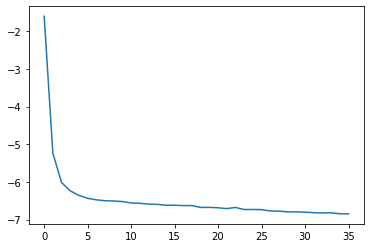

In [37]:
plt.plot(li)